In [2]:
import scvelo as scv


In [2]:
file="mouseBM_with_velo.h5ad"

In [6]:
?scv.read

Signature:
scv.read(
    filename: Union[pathlib.Path, str],
    backed: Union[Literal['r', 'r+'], NoneType] = None,
    sheet: Union[str, NoneType] = None,
    ext: Union[str, NoneType] = None,
    delimiter: Union[str, NoneType] = None,
    first_column_names: bool = False,
    backup_url: Union[str, NoneType] = None,
    cache: bool = False,
    cache_compression: Union[Literal['gzip', 'lzf'], NoneType, scanpy._utils.Empty] = <Empty.token: 0>,
    **kwargs,
) -> anndata._core.anndata.AnnData
Docstring:
Read file and return :class:`~anndata.AnnData` object.

To speed up reading, consider passing ``cache=True``, which creates an hdf5
cache file.

Parameters
----------
filename : typing.Union[pathlib.Path, str]
    If the filename has no file extension, it is interpreted as a key for
    generating a filename via ``sc.settings.writedir / (filename +
    sc.settings.file_format_data)``.  This is the same behavior as in
    ``sc.read(filename, ...)``.
backed : typing.Union[typing.Literal

In [25]:
file = "mouseBM_with_velo.loom"
adata_loom = scv.read_loom(file)
adata_loom

AnnData object with n_obs × n_vars = 13949 × 31053
    obs: 'ADT.weight', 'BM_pred', 'Blood_pred', 'Bone_pred', 'RNA.weight', 'id', 'nCount_ADT', 'nCount_RNA', 'nCount_ambiguous', 'nCount_spliced', 'nCount_unspliced', 'nFeature_ADT', 'nFeature_RNA', 'nFeature_ambiguous', 'nFeature_spliced', 'nFeature_unspliced', 'orig.ident', 'percent.mt', 'seurat_clusters', 'wsnn_res.1'
    layers: 'counts'

In [38]:
adata_loom.X

<13949x31053 sparse matrix of type '<class 'numpy.float32'>'
	with 43492399 stored elements in Compressed Sparse Row format>

In [26]:
file = "mouseBM.h5ad"
adata = scv.read(file)
adata

AnnData object with n_obs × n_vars = 13949 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'RNA.weight', 'ADT.weight', 'wsnn_res.1', 'seurat_clusters', 'Blood_pred', 'BM_pred', 'Bone_pred', 'id'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_wnn.umap'
    varm: 'PCs'
    obsp: 'distances'

In [42]:
adata_loom.obsm['X_wnn.umap'] = adata.obsm['X_wnn.umap']

In [44]:
adata_loom.obs_names == adata.obs_names

array([ True,  True,  True, ...,  True,  True,  True])

In [29]:
adata.X.shape

(13949, 2000)

In [45]:

adata_loom.layers['spliced'] = s.X
adata_loom.layers['unspliced'] = u.X

In [4]:
# read data
file="mouseBM_with_velo.h5ad"
adata = scv.read(file)
s = scv.read("spliced.csv")
u = scv.read("unspliced.csv")
adata.layers['spliced'] = s.X
adata.layers['unspliced'] = u.X

ValueError: Value passed for key 'spliced' is of incorrect shape. Values of layers must match dimensions (0, 1) of parent. Value had shape (13949, 31053) while it should have had (13949, 2000).

In [5]:
s.X.shape

(13949, 31053)

In [19]:
?scv.pl.velocity_embedding_stream

Signature:
scv.pl.velocity_embedding_stream(
    adata,
    basis=None,
    vkey='velocity',
    density=None,
    smooth=None,
    min_mass=None,
    cutoff_perc=None,
    arrow_color=None,
    linewidth=None,
    n_neighbors=None,
    recompute=None,
    color=None,
    use_raw=None,
    layer=None,
    color_map=None,
    colorbar=True,
    palette=None,
    size=None,
    alpha=0.3,
    perc=None,
    X=None,
    V=None,
    X_grid=None,
    V_grid=None,
    sort_order=True,
    groups=None,
    components=None,
    legend_loc='on data',
    legend_fontsize=None,
    legend_fontweight=None,
    xlabel=None,
    ylabel=None,
    title=None,
    fontsize=None,
    figsize=None,
    dpi=None,
    frameon=None,
    show=None,
    save=None,
    ax=None,
    ncols=None,
    **kwargs,
)
Docstring:
Stream plot of velocities on the embedding.

Arguments
---------
adata: :class:`~anndata.AnnData`
    Annotated data matrix.
density: `float` (default: 1)
    Amount of velocities to show - 0 n

In [46]:
adata_loom

AnnData object with n_obs × n_vars = 13949 × 31053
    obs: 'ADT.weight', 'BM_pred', 'Blood_pred', 'Bone_pred', 'RNA.weight', 'id', 'nCount_ADT', 'nCount_RNA', 'nCount_ambiguous', 'nCount_spliced', 'nCount_unspliced', 'nFeature_ADT', 'nFeature_RNA', 'nFeature_ambiguous', 'nFeature_spliced', 'nFeature_unspliced', 'orig.ident', 'percent.mt', 'seurat_clusters', 'wsnn_res.1'
    obsm: 'X_wnn.umap'
    layers: 'counts', 'spliced', 'unspliced'

Filtered out 20764 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
computing neighbors
    finished (0:00:06) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:29) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:03) --> added
    'velocity_wnn.umap', embedded velocity vectors (adata.obsm)


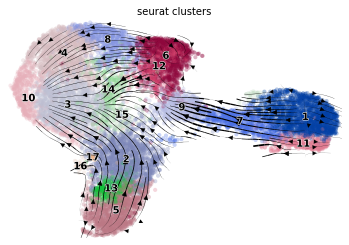

In [47]:

scv.pp.filter_and_normalize(adata_loom, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata_loom, n_pcs=30, n_neighbors=30)
scv.tl.velocity(adata_loom)
scv.tl.velocity_graph(adata_loom)
scv.pl.velocity_embedding_stream(adata_loom, basis="X_wnn.umap", color="seurat_clusters")


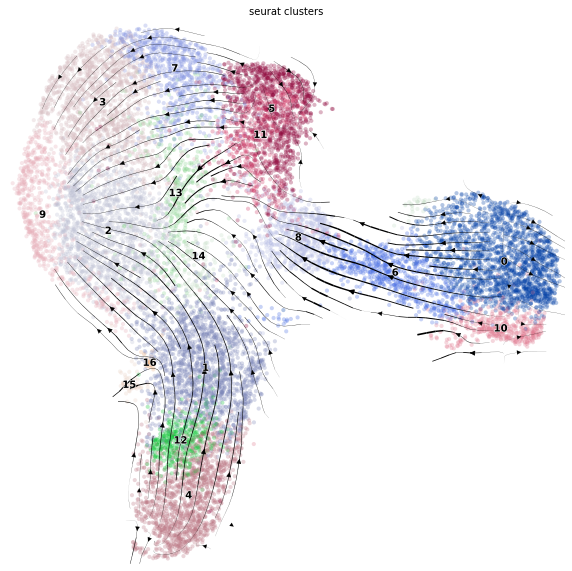

In [66]:

scv.pl.velocity_embedding_stream(adata_loom, basis="X_wnn.umap", color="seurat_clusters",figsize=(10,10))


In [65]:
adata_loom.obs['seurat_clusters'] = adata_loom.obs['seurat_clusters'].apply(lambda x:str(int(x)-1))

In [64]:
adata_loom.obs['seurat_clusters']

CellID
mWT_AAACCCAAGTGATCGG-1        10
mWT_AAACCCACAAACCATC-1         4
mWT_AAACCCACACTGTCCT-1         1
mWT_AAACCCACAGCCATTA-1        10
mWT_AAACCCAGTACCTAAC-1         6
                              ..
mNFIXko_TTTGTTGCAAGTGGGT-1     5
mNFIXko_TTTGTTGCACGCTATA-1     4
mNFIXko_TTTGTTGCAGTAACCT-1     7
mNFIXko_TTTGTTGCATCGGAGA-1    10
mNFIXko_TTTGTTGGTACCAATC-1     9
Name: seurat_clusters, Length: 13949, dtype: category
Categories (17, object): ['1', '2', '3', '4', ..., '14', '15', '16', '17']